# KNN / 선형 회귀분석


In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

* 맥북에서


Text(0, 0.5, 'target')

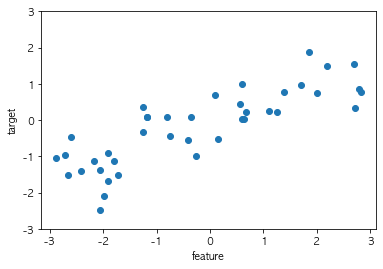

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")

In [3]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split 

In [4]:
X,y = mglearn.datasets.make_wave(n_samples=40)

- make_wave 함수를 이용하여 데이터셋을 만들어준다.


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

- 데이터셋을 훈련세트와 테스트세트로 나눠준다.

In [6]:
reg = KNeighborsRegressor(n_neighbors=3)

- 이웃의 수를 3으로 하여 모델의 객체를 생성한다.

In [7]:
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

- 훈련데이터와 타깃을 사용하여 모델을 학습시킨다.

In [8]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [9]:
print("테스트 세트 R^2:{:.2f}".format(reg.score(X_test,y_test)))

테스트 세트 R^2:0.83


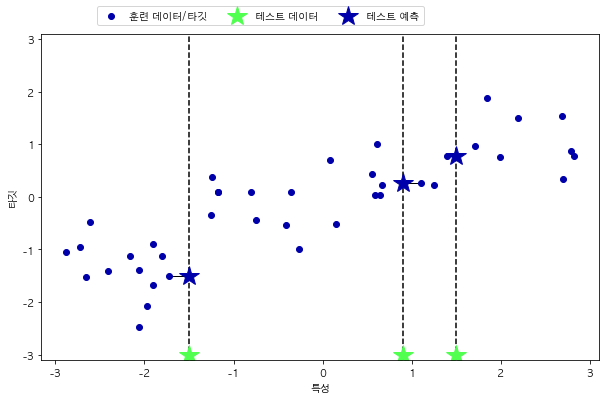

In [10]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

- K = 1 일때는 가장 가까운 한개의 값으로 측정함

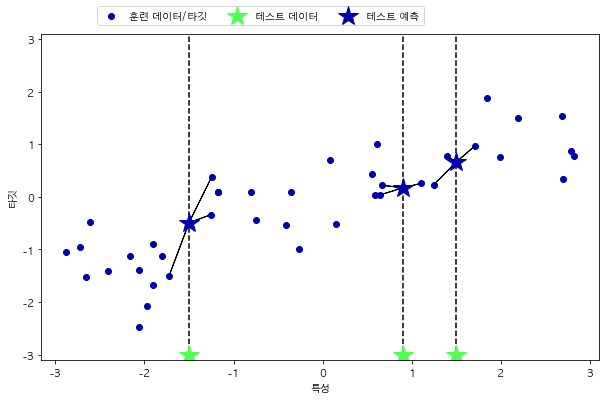

In [11]:
mglearn.plots.plot_knn_regression(n_neighbors=3)


- k=3 일때는 가장 가까운 3개의 평균 값을 측정함.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.4)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

- 위와 조건은 값지만 테스트 사이즈만 변경 되었을때 출력

In [13]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.42989718  0.82597372 -1.89415682 -1.04203645 -1.63113382
  0.16931864  0.91241374 -0.44561282 -1.04203645 -0.49284968  0.82597372
 -1.04203645  0.41271285 -0.44561282  0.42989718]


In [14]:
print("테스트 세트 R^2:{:.2f}".format(reg.score(X_test,y_test)))

테스트 세트 R^2:0.68


X_traing.shape: (24, 1) X_test.shape : (16, 1)
X_traing.shape: (24, 1) X_test.shape : (16, 1)
X_traing.shape: (24, 1) X_test.shape : (16, 1)


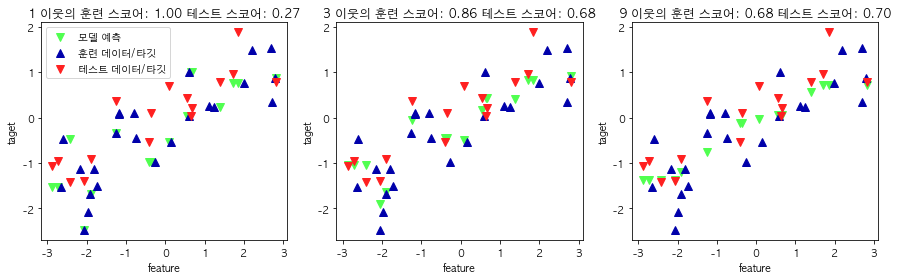

In [15]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
for n_neighbors, ax in zip([1,3,9],axes):
    # K=1,3,9 일때 예측
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    print("X_traing.shape: {}".format(X_train.shape), "X_test.shape : {}".format(X_test.shape))
    reg.fit(X_train,y_train)
    ax.plot(X_test, reg.predict(X_test),'v',c=mglearn.cm3(2),markersize=8)
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title("{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("taget")
    axes[0].legend(["모델 예측","훈련 데이터/타깃","테스트 데이터/타깃"], loc="best")

- 이웃이 1,3,9 개일때의 평균을 예측 하기때문에 첫번째, 두번째, 세번째 예측 값이 조금씩 차이나는 것을 볼수있다.


- 이웃이 9개일때 조금더 선형에 비슷한 모습을 볼수 있음.

# 선형회귀모델 

In [16]:
# x 값과 y 값 

x=[2, 4, 6, 8]
y=[81, 93, 91, 97]
# x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)

print("x의 평균값:", mx)
print("y의 평균값:", my)
# 기울기 공식의 분모
divisor = sum([(mx - i)**2 for i in x])

# 기울기 공식의 분자 
def top(x, mx, y, my):
    d=0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)
print("분모:", divisor)
print("분자:", dividend)

# 기울기와 y 절편 구하기
a = dividend / divisor
b = my - (mx*a)
# 출력으로 확인
print("기울기 a =", a) 
print("y 절편 b =", b)


x의 평균값: 5.0
y의 평균값: 90.5
분모: 20.0
분자: 46.0
기울기 a = 2.3
y 절편 b = 79.0


In [17]:
import numpy as np 
# 기울기 a와 y 절편 b
ab = [3, 76]

# x, y의 데이터 값
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# y = ax + b에 a와 b 값을 대입하여 결과를 출력하는 함수
def predict(x):
    return ab[0]*x + ab[1]
# RMSE 함수
def rmse(p, a):
    return np.sqrt(((p - a) ** 2).mean())

# RMSE 함수를 각 y 값에 대입하여 최종 값을 구하는 함수
def rmse_val(predict_result,y):
    return rmse(np.array(predict_result), np.array(y))

# 예측 값이 들어갈 빈 리스트
predict_result = []

# 모든 x 값을 한 번씩 대입하여
for i in range(len(x)):
    # predict_result 리스트를 완성한다.
    predict_result.append(predict(x[i]))
    print("공부한 시간 = %.f, 실제 점수 = %.f, 예측 점수 = %.f" % (x[i], y[i], predict(x[i])))
    
print("rmse 최종값: " + str(rmse_val(predict_result,y)))

공부한 시간 = 2, 실제 점수 = 81, 예측 점수 = 82
공부한 시간 = 4, 실제 점수 = 93, 예측 점수 = 88
공부한 시간 = 6, 실제 점수 = 91, 예측 점수 = 94
공부한 시간 = 8, 실제 점수 = 97, 예측 점수 = 100
rmse 최종값: 3.3166247903554


# 셈플의 갯수 바꾸면서 확인

In [18]:
from sklearn.linear_model import LinearRegression 
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))
print("lr.coef_:", lr.coef_)
print("lr.intercept_:",lr.intercept_)

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66
lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [19]:
from sklearn.linear_model import LinearRegression 
X,y = mglearn.datasets.make_wave(n_samples=100)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))
print("lr.coef_:", lr.coef_)
print("lr.intercept_:",lr.intercept_)

훈련 세트 점수: 0.59
테스트 세트 점수: 0.66
lr.coef_: [0.40443939]
lr.intercept_: -0.022568028173365354


In [20]:
from sklearn.linear_model import LinearRegression 
X,y = mglearn.datasets.make_wave(n_samples=500)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))
print("lr.coef_:", lr.coef_)
print("lr.intercept_:",lr.intercept_)

훈련 세트 점수: 0.68
테스트 세트 점수: 0.57
lr.coef_: [0.48215751]
lr.intercept_: 0.04154708498957077


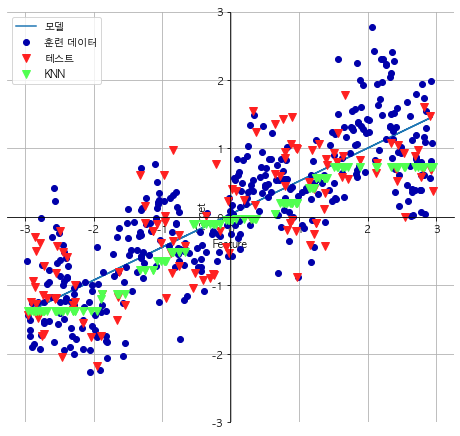

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.plot(X_train,lr.predict(X_train))
plt.plot(X_train, y_train, 'o', c=mglearn.cm2(0))
plt.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

# KNN 결과 출력
#1차원 특징이라서 정확률이 낮다. 샘플수가 커질수록 정확률이 낮다. 데이터의 분포가 퍼져서
plt.plot(X_test, reg.predict(X_test),'v', c=mglearn.cm3(2), markersize=8)
ax = plt.gca()
ax.spines['left'].set_position('center') 
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center') 
ax.spines['top'].set_color('none')
ax.set_ylim(-3, 3)
ax.set_xlabel("Feature")
ax.set_ylabel("Target")
ax.legend(["모델", "훈련 데이터", "테스트", "KNN"], loc="best")
ax.grid(True)
ax.set_aspect('equal')

# 보스톤 주택 가격 예측 (데이터 살펴보기)

In [31]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

print("boston.key(): {}\n".format(boston.keys()))
print("Data의 크기: {}\n".format(boston['data'].shape))
print("특성의 이름: {}\n".format(boston.feature_names))
print(boston['DESCR']+"\n...")

df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.head())


boston.key(): dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Data의 크기: (506, 13)

특성의 이름: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS 

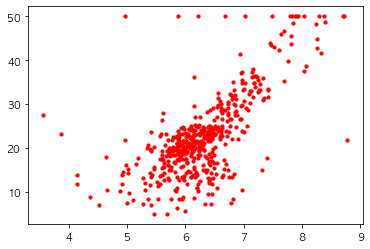

In [32]:
import matplotlib.pyplot as plt
plt.scatter(boston.data[:,5],boston.target,color='r',s=10)

In [39]:
X = boston.data[:,5]

print(X.shape)

(506,)


In [41]:
X_1 = np.atleast_2d(X)
X_2 = np.transpose(X_1)
print(X_2.shape)
y = boston.target

lr.fit(X_2,y)

y_predicted = lr.predict(X_2)
print("w[0]: %f b: %f" %(lr.coef_[0], lr.intercept_))


(506, 1)
w[0]: 9.102109 b: -34.670621


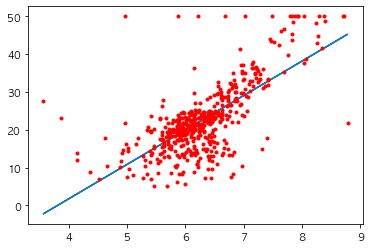

In [43]:
plt.plot(X_2,y_predicted)
plt.plot(X_2,y,'o',color='r',markersize=3)

 ## KNN, LinearRegression으로 다른결과값 확인

In [45]:
X_train, X_test,y_train, y_test = train_test_split(boston.data,boston.target,random_state=0)
print("X_train.shape : {}".format(X_train.shape), "X_test.shape : {}".format(X_test.shape))
lr = LinearRegression().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))

X_train.shape : (379, 13) X_test.shape : (127, 13)
훈련 세트 점수: 0.77
테스트 세트 점수: 0.64


In [47]:
X_train, X_test,y_train, y_test = train_test_split(boston.data,boston.target,random_state=0)
print("X_train.shape : {}".format(X_train.shape), "X_test.shape : {}".format(X_test.shape))
lr = KNeighborsRegressor().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))

X_train.shape : (379, 13) X_test.shape : (127, 13)
훈련 세트 점수: 0.71
테스트 세트 점수: 0.46


In [51]:
X, y =mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=0)
print("X_train.shape : {}".format(X_train.shape), "X_test.shape : {}".format(X_test.shape))
lr = LinearRegression().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))

X.shape: (506, 104)
X_train.shape : (379, 104) X_test.shape : (127, 104)
훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [54]:
X, y =mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=0)
print("X_train.shape : {}".format(X_train.shape), "X_test.shape : {}".format(X_test.shape))
lr = KNeighborsRegressor(n_neighbors=5).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))

X.shape: (506, 104)
X_train.shape : (379, 104) X_test.shape : (127, 104)
훈련 세트 점수: 0.83
테스트 세트 점수: 0.56


In [55]:
X, y =mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=0)
print("X_train.shape : {}".format(X_train.shape), "X_test.shape : {}".format(X_test.shape))
lr = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))

X.shape: (506, 104)
X_train.shape : (379, 104) X_test.shape : (127, 104)
훈련 세트 점수: 0.90
테스트 세트 점수: 0.61


# 릿지 회귀 (Ridge Regression)

In [58]:
from sklearn.linear_model import Ridge 

ridge = Ridge().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [61]:
lr = LinearRegression().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [63]:
Knn = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(Knn.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(Knn.score(X_test,y_test)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.61


- 3가지 모델로 score 확인

#  alpha 에 따른 결과 

In [93]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [94]:
ridge5 = Ridge(alpha=5).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge5.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge5.score(X_test,y_test)))


훈련 세트 점수: 0.82
테스트 세트 점수: 0.68


In [95]:
ridge05 = Ridge(alpha=0.5).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge05.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge05.score(X_test,y_test)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77


In [96]:
ridge03 = Ridge(alpha=0.3).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge03.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge03.score(X_test,y_test)))

훈련 세트 점수: 0.91
테스트 세트 점수: 0.77


In [97]:
ridge02 = Ridge(alpha=0.2).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge02.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge02.score(X_test,y_test)))

훈련 세트 점수: 0.92
테스트 세트 점수: 0.77


In [98]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test,y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


In [99]:
ridge001 = Ridge(alpha=0.01).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge001.score(X_test,y_test)))

훈련 세트 점수: 0.94
테스트 세트 점수: 0.70


##### alpha가 작을때
- 선형모델과 비슷해진다 
- 계수에 거의 제한을 두지 않는다
- 계수에 대한 제약이 풀린다.

# 라쏘 회귀모델

In [100]:
from sklearn.linear_model import Lasso 
lasso = Lasso().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 개수:{}".format(np.sum(lasso.coef_ !=0)))
print(lasso.coef_)

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수:4
[-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.         -0.          0.      

In [101]:
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성의 개수:{}".format(np.sum(lasso001.coef_ !=0)))
print(lasso001.coef_)

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수:33
[ -0.          -0.          -0.           0.          -0.
   0.          -0.          -1.43260465  10.94771183   0.
   0.           0.          -0.39260971  -0.          -0.
  -0.           0.          -0.          -0.          -0.
  -0.          -8.75628457  -0.          -0.          -0.
  -0.           2.10027365  -0.           0.          -0.
   0.          -0.           0.           0.          -0.
   0.          -0.          -0.           0.           0.
   0.          -0.           0.          -3.96958293   0.
   6.61845793  -0.          -0.          -0.           0.
  -4.42086828  -2.10371434   3.79607992  -0.           4.38591262
   0.           0.           0.1795777   -0.          -1.1614282
  -4.33485764  -0.          -0.          -2.13549022  -0.
  -1.85967636  -0.          -0.          29.81957225  -2.05624806
   0.         -11.98034348 -11.14870694 -11.67147204  12.974385
 -10.93053676  -0.          -0.           3.441574     0

In [102]:
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("사용한 특성의 개수:{}".format(np.sum(lasso00001.coef_ !=0)))
print(lasso00001.coef_)

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수:96
[-0.00000000e+00 -2.22112506e+01 -8.50460785e+01 -8.84911727e+00
 -3.29747331e+00  3.80364498e+01  4.79228263e+01 -3.79968178e+01
  2.78218641e+01  0.00000000e+00 -7.57027820e-01  2.59844375e+00
 -1.10854083e+01  1.00632159e+01  0.00000000e+00  0.00000000e+00
  1.13251636e+02 -1.67111092e+01  2.77529962e+01 -3.05160674e+01
  0.00000000e+00 -1.01269722e+01 -0.00000000e+00 -0.00000000e+00
 -3.97525034e-01  3.03276326e+01 -8.17609874e+00 -1.41714196e+01
 -2.24575996e+00 -5.24158108e+01  7.09612408e+00  2.49508901e+00
 -7.19880905e+00 -2.94632210e+00  2.58438205e+01 -5.14091096e+00
  3.32496024e+01 -1.26505982e+01  3.03546677e+01 -1.08693198e+00
  1.82716499e+01  4.76099968e+01  1.24705759e+01  4.17977677e+01
 -0.00000000e+00  1.97409406e+01 -7.42612798e+00  1.95633038e+01
 -1.29388874e+01 -1.53095081e+01 -1.65903957e+01 -3.12385990e+01
  8.10044556e+00 -3.21997233e+00  9.12508109e+00 -3.81106728e+00
 -8.05567972e+00  5.19015323e+01 -1.74746089e

Text(0, 0.5, '계수 크기')

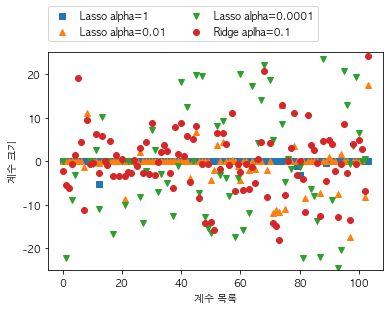

In [110]:
plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o',Label="Ridge aplha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

#      로지스틱 회귀분석(Logistic Regression)

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()

print(list(iris.keys()))
print("타깃의 이름 : {}".format(iris['target_names']))
print("특성의 이름 : {}".format(iris['feature_names']))
X= iris["data"][:,3:]
print(X.shape)
y = (iris["target"]==2).astype(np.int)
print(y.shape)

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
타깃의 이름 : ['setosa' 'versicolor' 'virginica']
특성의 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 1)
(150,)


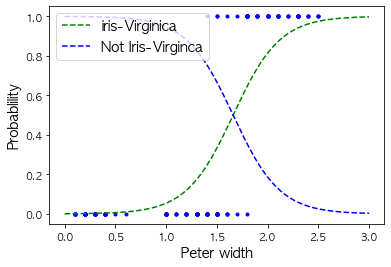

In [129]:
log_reg =LogisticRegression(solver = 'lbfgs')
log_reg.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g--",label="iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginca")
plt.xlabel("Peter width", fontsize =14)
plt.ylabel("Probablility",fontsize =14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [130]:
log_reg.predict([[1.7],[1.5],[1.3],[2.0]])

array([1, 0, 0, 1])

/Users/diadld3naver.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


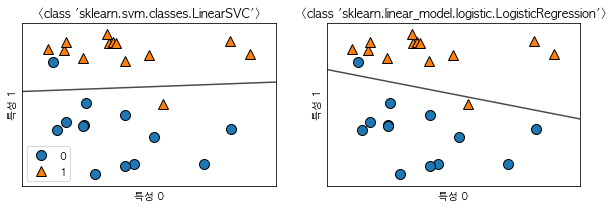

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model , ax in zip([LinearSVC(), LogisticRegression(solver='lbfgs')],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator( clf, X, fill=False, eps=0.5,ax=ax,alpha=.7)
    
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__,__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()                         
                         

In [150]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg = LogisticRegression(solver='lbfgs',max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test,y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [154]:
logreg100 = LogisticRegression(C=100,solver='lbfgs',max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test,y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.972


In [152]:
logreg001 = LogisticRegression(C=0.01,solver='lbfgs',max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test,y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


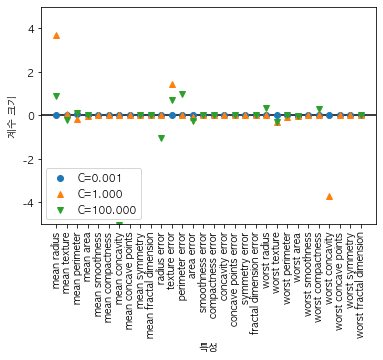

In [164]:
for C ,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 =LogisticRegression(solver='liblinear',C=C,penalty="l1",max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
    

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)


C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.92
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.94
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.95
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.97
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.97


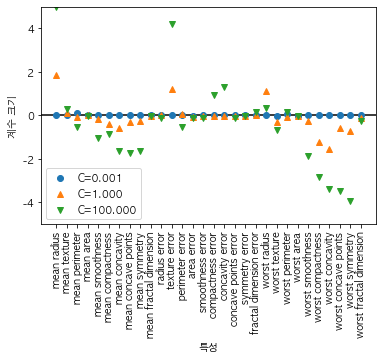

In [167]:
for C ,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 =LogisticRegression(solver='liblinear',C=C,penalty="l2",max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
    

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)



C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
사용한 특성의 개수 : 3
사용한 특성: [[ 0.          0.          0.05730932  0.00493973  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.00987449
   0.          0.          0.          0.          0.          0.        ]]

C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
사용한 특성의 개수 : 10
사용한 특성: [[ 3.67545696  0.08053521 -0.15951827 -0.01236754  0.          0.
   0.          0.          0.          0.          0.          1.42686368
   0.         -0.09282317  0.          0.          0.          0.
   0.          0.          0.         -0.32862632 -0.0551037  -0.01710208
   0.          0.         -3.70450427  0.          0.          0.        ]]

C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98
사용한 특성의 개수 : 23
사용한 특성: [[ 8.9

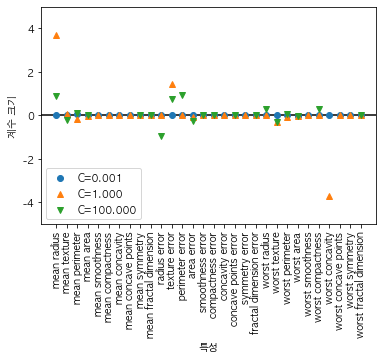

In [166]:
for C ,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 =LogisticRegression(solver='liblinear',C=C,penalty="l1",max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
    print("사용한 특성의 개수 : {}".format(np.sum(lr_l1.coef_!=0)))
    print("사용한 특성: {}\n".format(lr_l1.coef_))
    

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)



### 3주차 강의 후 코드와 결과에 대한 고찰

- 처음에는 코드가 잘 이해 되지않았지만 그때 강의를 멈추고 코드를 작성하면서 잘 이해가 되지 않는부분이 있다면 검색을 통해서 하나하나 해결하다보니 어느새 조금씩 코드를 이해하고 있었습니다. 하지만 이해해야 할 양이 너무많아 시간이 너무 많이 들었지만 그만큼 실력 향상에 도움이 됬다고 생각됩니다.